In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Set Seaborn style
sns.set(style="whitegrid")

# Load processed dataset
df = pd.read_csv("../data/processed/health_vs_life.csv")

# Show basic info
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (3680, 8)
Columns: ['Country Name', 'Country Code', 'Year', 'health_exp_per_capita', 'health_exp_percent', 'health_exp_ppp_per_capita', 'health_exp_total', 'Life Expectancy']


In [4]:
# Check for missing values
missing_summary = df.isna().sum()
display(missing_summary[missing_summary > 0])

# Check date and country ranges
print("Years:", df['Year'].min(), "-", df['Year'].max())
print("Unique countries:", df['Country Code'].nunique())


Series([], dtype: int64)

Years: 1995 - 2014
Unique countries: 186


In [5]:
# Life Expectancy Summary (2014)

df_2014 = df[df["Year"] == 2014]
print("\n" + "==" * 20)
print("Life Expectancy Summary (2014):")
print(df_2014["Life Expectancy"].describe())

# Top and bottom 5 countries
print("\n" + "==" * 20)
print("Top 5 countries by life expectancy:")
print(df_2014.sort_values("Life Expectancy", ascending=False)[["Country Name", "Life Expectancy"]].head(5))

print("\n" + "==" * 20)
print("Bottom 5 countries by life expectancy:")
print(df_2014.sort_values("Life Expectancy")[["Country Name", "Life Expectancy"]].head(5))



Life Expectancy Summary (2014):
count    186.000000
mean      71.126278
std        8.422493
min       40.265200
25%       65.314000
50%       72.142450
75%       77.174550
max       85.092500
Name: Life Expectancy, dtype: float64

Top 5 countries by life expectancy:
     Country Name  Life Expectancy
2081       Monaco          85.0925
3001   San Marino          84.3941
1684        Japan          83.6434
592   Switzerland          83.0841
1624        Italy          82.9008

Bottom 5 countries by life expectancy:
                  Country Name  Life Expectancy
552   Central African Republic          40.2652
3024               South Sudan          45.6247
1981                   Lesotho          50.7865
3204                      Chad          51.1411
2461                   Nigeria          51.9401


### Global Overview

The countries with the highest expectancies represent a mix of European microstates and advanced economies with well-established healthcare systems, high income per capita, and strong public health infrastructure.

On the other end of the spectrum:

- Central African Republic had the lowest life expectancy at just 40.3 years.

- Other countries in the bottom five included South Sudan (45.6), Lesotho (50.8), Chad (51.1), and Nigeria (51.9).

These are all Sub-Saharan African nations, often affected by a combination of high infant mortality, infectious disease burden, low healthcare access, and conflict or instability.

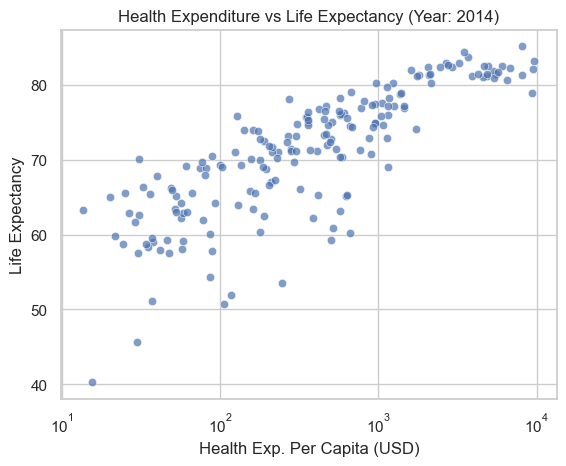

In [6]:
sns.scatterplot(
    data=df[df['Year'] == 2014],
    x="health_exp_per_capita",
    y="Life Expectancy",
    alpha=0.7,
)
plt.xscale("log")
plt.title("Health Expenditure vs Life Expectancy (Year: 2014)")
plt.xlabel("Health Exp. Per Capita (USD)")
plt.ylabel("Life Expectancy")
plt.show()

### General Trend

The scatter plot shows a clear, positive correlation between a country's health expenditure per capita and its average life expectancy. As countries spend more on healthcare (on a per-person basis), their citizens generally live longer.

But this relationship is not linear—instead, it exhibits diminishing returns:

- At low spending levels (e.g., $10–$500), small increases in spending correlate with large gains in life expectancy.

- Beyond ~$2,000 per capita, life expectancy plateaus, clustering around 80–85 years even as spending rises dramatically.


### Efficiency Gap

This pattern reveals an important insight:

- Once basic health needs are met, additional spending yields smaller life expectancy gains.

This suggests that:

- High-income countries with extremely high spending may overspend inefficiently.

- Some middle-income countries achieve high life expectancy at moderate cost, showing better cost-effectiveness.

### Outliers & Inequality

Several countries spend very little (<$100 per capita) yet maintain life expectancies above 65, highlighting potential:

- Success in public health campaigns

- Impact of community-based care or NGO programs

- Underreporting or anomalies in data

Meanwhile, some countries with high spending but lower-than-expected life expectancy may face:

- Inefficiencies in healthcare delivery

- Lifestyle diseases or inequality

- Structural barriers to care

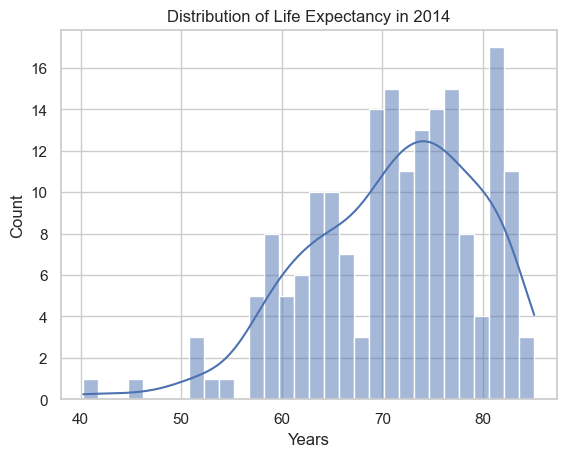

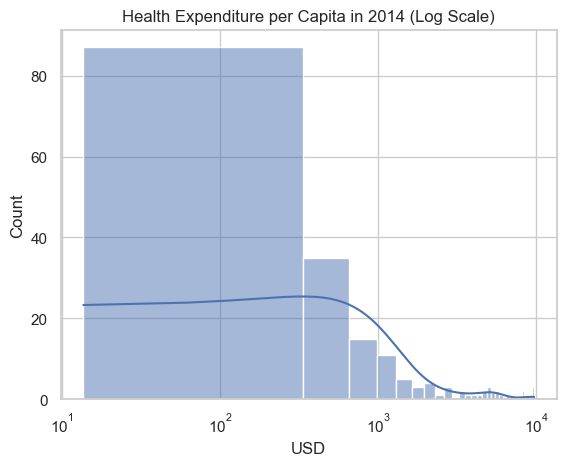

In [7]:
# Life Expectancy
sns.histplot(df_2014["Life Expectancy"], kde=True, bins=30)
plt.title("Distribution of Life Expectancy in 2014")
plt.xlabel("Years")
plt.show()

# Health Expenditure Per Capita (log scale)
sns.histplot(df_2014["health_exp_per_capita"], kde=True, bins=30)
plt.xscale("log")
plt.title("Health Expenditure per Capita in 2014 (Log Scale)")
plt.xlabel("USD")
plt.show()


Text(0.5, 1.0, 'Avg. Life Expectancy per Country (1995–2014)')

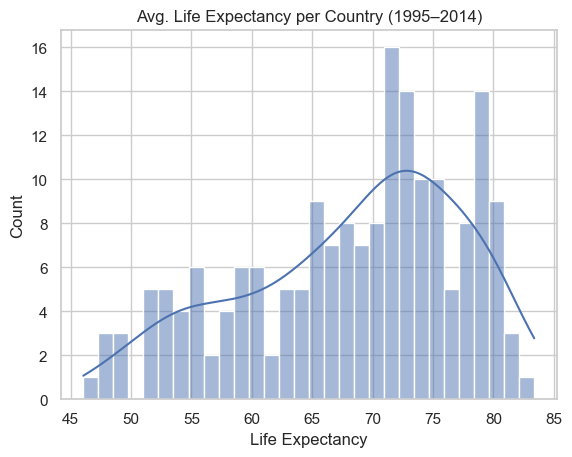

In [8]:
df_country_avg = df.groupby("Country Code").agg({
    "Life Expectancy": "mean",
    "health_exp_per_capita": "mean"
}).reset_index()

sns.histplot(df_country_avg["Life Expectancy"], kde=True, bins=30)
plt.title("Avg. Life Expectancy per Country (1995–2014)")


### Distribution Overview

- The distribution is right-skewed, peaking between 70 and 75 years, where most countries fall.

- A smaller but notable group reaches 80+ years, representing the world's healthiest nations.

- There's a long tail on the left: several countries average below 60 years, with a few even under 50.

### Global Health Inequality

- The spread of this distribution reflects health inequality across the globe.

- While many countries approach the global health ceiling of ~80 years, others still struggle with high infant mortality, infectious diseases, and conflict-driven health breakdowns.

- The lower bound (around 45–50 years) suggests persistent systemic challenges in Sub-Saharan Africa and parts of South Asia.

In [9]:
selected = [
    "ETH", "NGA", "IND",       # Low-income
    "BRA", "TUR", "CHN",       # Middle-income
    "USA", "DEU", "NOR", "JPN" # High-income
]

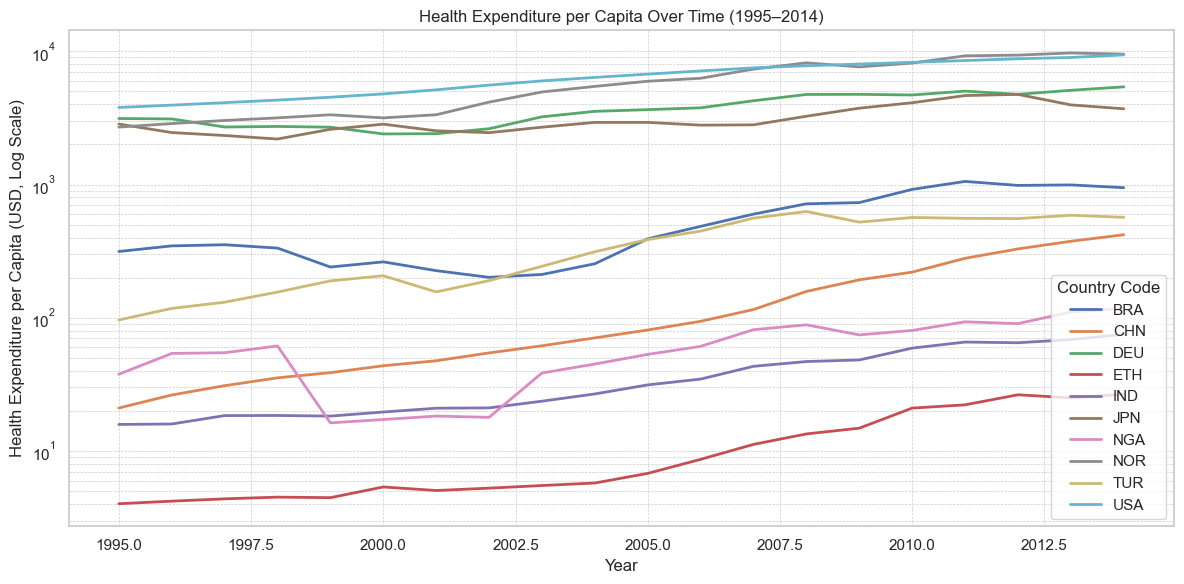

In [10]:
df_selected = df[df["Country Code"].isin(selected)]

# Plot health expenditure per capita over time
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_selected,
    x="Year",
    y="health_exp_per_capita",
    hue="Country Code",
    linewidth=2
)
plt.yscale("log")
plt.title("Health Expenditure per Capita Over Time (1995–2014)")
plt.xlabel("Year")
plt.ylabel("Health Expenditure per Capita (USD, Log Scale)")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

### High-Income Countries: Plateauing at the Top

- USA and Norway stand out, spending more than $9,000 per person by 2014, nearly double the next closest countries.

- Japan (JPN) and Germany (DEU) also demonstrate consistently high expenditure, hovering between $3,000–$5,000 per capita.


### Middle-Income Countries: Steady Growth

- Turkey (TUR) and Brazil (BRA) both exhibit steady growth.

- China (CHN) shows an especially steep upward trajectory, reflecting its economic rise and health sector investment. They start from a very low point. (possibly because of bad economic situation, very high population)

- India (IND) remains on the lower end of this group, showing modest growth, but still below $70. Their starting point was also very bad, likely due to similar reasons to China.

These countries are transitioning, closing gaps through policy reform, urbanization, and global aid partnerships.

### Low-Income Countries: Starting from the Bottom

- Nigeria (NGA) and Ethiopia (ETH) begin with extremely low spending levels—often under $50 per person.

- Ethiopia’s curve notably climbs after 2005, possibly due to international aid, NGO presence, and government reform.

- The vertical distance between low- and high-income countries spans three orders of magnitude—a stark visualization of global inequality.

### Volatility & Anomalies

- Nigeria shows a sharp dip around 2000, possibly due to conflict, financial crises, or reporting inconsistencies.

- India and China maintain smoother, more predictable upward curves, reflecting consistent development priorities.



From under $10 to nearly $10,000 per person per year, this chart encapsulates the global spectrum of healthcare investment—and the systemic disparities that shape health outcomes.

While money isn’t the only determinant of health, this visualization clearly shows that without basic financial resources, countries struggle to provide even the most essential services.

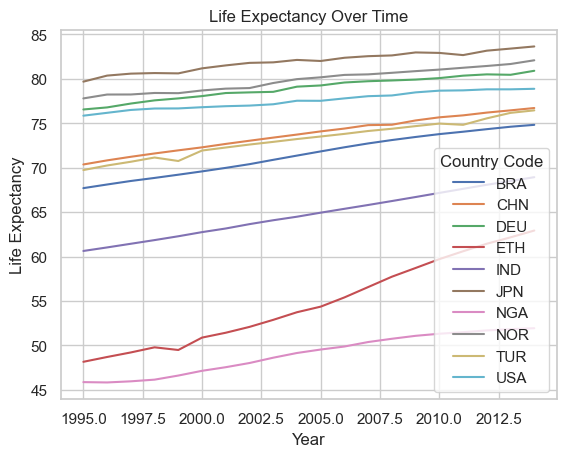

In [11]:
df_sel = df[df["Country Code"].isin(selected)]

sns.lineplot(data=df_sel, x="Year", y="Life Expectancy", hue="Country Code")
plt.title("Life Expectancy Over Time")
plt.show()

The line plot displays consistent improvement in life expectancy across all 10 selected countries. While high-income countries maintain a steady lead, the most dramatic gains are seen in low- and middle-income nations.

### Low-Income Highlights: Ethiopia vs. Nigeria

- Ethiopia (ETH) shows the steepest improvement, climbing from ~47 to ~65 years—a gain of nearly 18 years in two decades.

- Nigeria (NGA), despite spending more per capita on health, lags behind, rising from ~46 to only ~54 years.

More spending does not guarantee better outcomes. Ethiopia’s success likely stems from effective public health programs, foreign aid utilization, and rapid improvements in maternal/child care.

Meanwhile, Nigeria’s lower trajectory may reflect:

- Inefficiencies in health infrastructure

- Corruption or misallocation of funds

- Conflict and instability



### Middle-Income Movers

- India (IND) and China (CHN) show steady, moderate gains. China's leap—from ~70 to ~76 years—tracks with rising healthcare investment and economic growth.

- Turkey (TUR) and Brazil (BRA) climb from low- to mid-70s, closely mirroring each other. Both show consistent upward trajectories and effective health reform during the 2000s.


### High-Income Stability

- Japan (JPN) leads the chart, consistently above 83 years, reinforcing its global reputation for longevity.

- Norway (NOR) and Germany (DEU) follow closely, with life expectancies around 81–82 years.

- The United States (USA) remains below its peers—hovering around 78–79 years—despite the highest per-capita health spending globally.

This underperformance may highlight systemic inefficiencies, such as unequal access to care, chronic disease burden, and lack of universal insurance. It may also show that lifestyle differences take part.

Up to this point, our analysis of global health inequality has focused entirely on health expenditure per capita (in USD). While this metric offers valuable insights into the raw amount each country spends on healthcare per person, it doesn't tell the full story.

To understand the economic effort, cost-efficiency, and structural capacity of different health systems, we need to explore three additional indicators:

- health_exp_percent: Health spending as a percentage of GDP. This shows how much priority a country places on healthcare relative to its overall economy.

- health_exp_ppp_per_capita: Health spending per capita, adjusted for purchasing power parity (PPP). This accounts for cost-of-living differences across countries, offering a more accurate comparison of what each dollar can actually buy.

- health_exp_total: Total national health expenditure in USD. This reveals the absolute scale of a country’s healthcare economy and is particularly sensitive to population size.



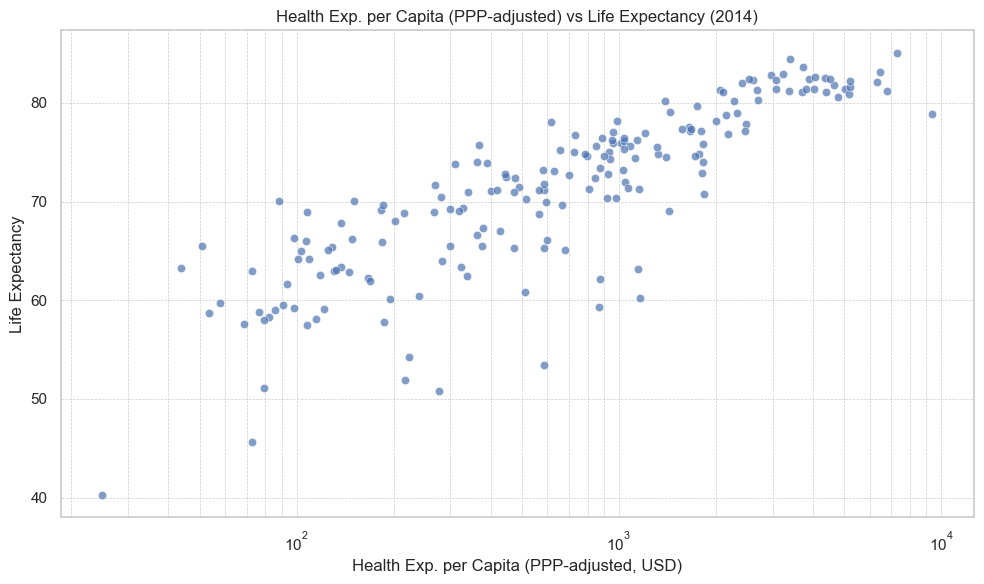

In [12]:
# Filter for 2014
df_2014 = df[df["Year"] == 2014].copy()

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_2014,
    x="health_exp_ppp_per_capita",
    y="Life Expectancy",
    alpha=0.7
)
plt.xscale("log")
plt.title("Health Exp. per Capita (PPP-adjusted) vs Life Expectancy (2014)")
plt.xlabel("Health Exp. per Capita (PPP-adjusted, USD)")
plt.ylabel("Life Expectancy")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


- Cleaner relationship than raw USD: accounting for cost of living clearly improves the alignment between spending and life expectancy.

- Countries with similar PPP-adjusted spending tend to cluster around comparable outcomes.

- Suggests that spending power parity matters—$1 in Ethiopia ≠ $1 in the U.S.

### Insight: 
Once we control for purchasing power, the inequality in effectiveness becomes more visible. Some countries achieve much higher life expectancy per dollar spent.

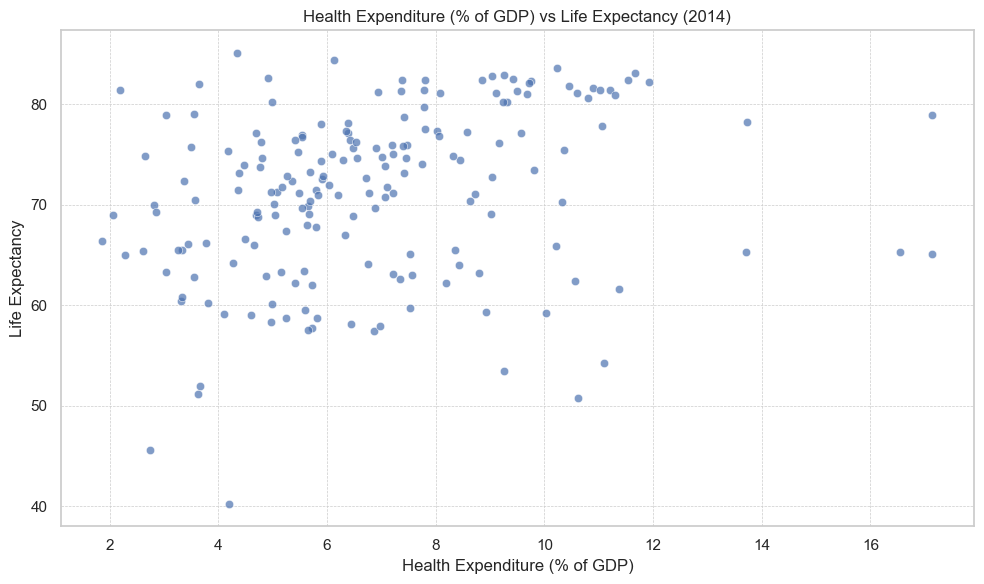

In [13]:
# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_2014,
    x="health_exp_percent",
    y="Life Expectancy",
    alpha=0.7
)
plt.title("Health Expenditure (% of GDP) vs Life Expectancy (2014)")
plt.xlabel("Health Expenditure (% of GDP)")
plt.ylabel("Life Expectancy")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


- Weak or noisy relationship: there's no strong correlation between GDP share and life expectancy.

- Some low-life-expectancy countries spend a high % of GDP (perhaps due to limited total GDP), while rich countries like the U.S. also spend >16% with mixed results.

- Many outliers exist—suggesting spending prioritization ≠ effectiveness.

### Insight: 
Spending more of your GDP on health does not guarantee better outcomes. It may reflect inefficiencies or the burden of expensive private systems.

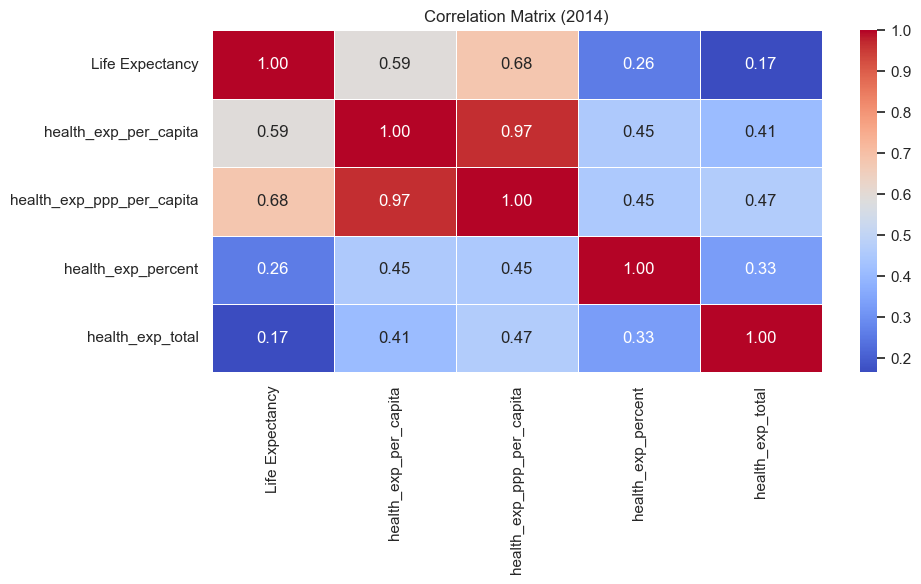

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_data = df_2014[[
    "Life Expectancy",
    "health_exp_per_capita",
    "health_exp_ppp_per_capita",
    "health_exp_percent",
    "health_exp_total",
    ]]

corr_matrix = correlation_data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix (2014)")
plt.tight_layout()
plt.show()


In [15]:
import numpy as np

def gini(array):
    """Compute Gini coefficient of a numpy array."""
    array = array.flatten()
    if np.amin(array) < 0:
        array -= np.amin(array)
    array += 1e-9  # Avoid division by zero
    array = np.sort(array)
    n = array.size
    index = np.arange(1, n + 1)
    return (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))


In [16]:
gini_life = gini(df_2014["Life Expectancy"].dropna().values)
gini_spending = gini(df_2014["health_exp_per_capita"].dropna().values)
gini_ppp = gini(df_2014["health_exp_ppp_per_capita"].dropna().values)
gini_percent = gini(df_2014["health_exp_percent"].dropna().values)
print("\n" + "==" * 20)

print(f"Gini of Life Expectancy (2014): {gini_life:.3f}")
print(f"Gini of Health Spending Per Capita (2014): {gini_spending:.3f}")
print(f"Gini of Health Spending Per Capita (PPP-adjusted, 2014): {gini_ppp:.3f}")
print(f"Gini of Health Spending (% of GDP, 2014): {gini_percent:.3f}")



Gini of Life Expectancy (2014): 0.066
Gini of Health Spending Per Capita (2014): 0.698
Gini of Health Spending Per Capita (PPP-adjusted, 2014): 0.581
Gini of Health Spending (% of GDP, 2014): 0.222


In [17]:
gini_results = []

# Loop through each year
for year in sorted(df["Year"].unique()):
    df_year = df[df["Year"] == year]
    le_vals = df_year["Life Expectancy"].dropna().values
    spend_vals = df_year["health_exp_per_capita"].dropna().values
    ppp_vals = df_year["health_exp_ppp_per_capita"].dropna().values
    percent_vals = df_year["health_exp_percent"].dropna().values

    if len(le_vals) > 10 and len(spend_vals) > 10:
        gini_results.append({
            "Year": year,
            "Gini_Life": gini(le_vals),
            "Gini_Spending": gini(spend_vals),
            "Gini_PPP ": gini(ppp_vals),
            "Gini_Percent": gini(percent_vals)
        })

# Convert to DataFrame
gini_df = pd.DataFrame(gini_results)

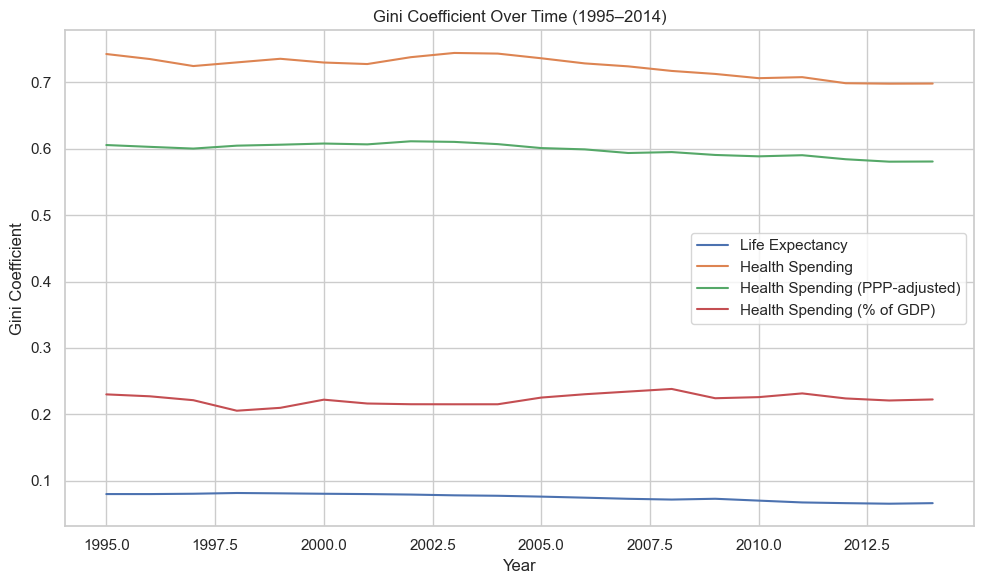

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=gini_df, x="Year", y="Gini_Life", label="Life Expectancy")
sns.lineplot(data=gini_df, x="Year", y="Gini_Spending", label="Health Spending")
sns.lineplot(data=gini_df, x="Year", y="Gini_PPP ", label="Health Spending (PPP-adjusted)")
sns.lineplot(data=gini_df, x="Year", y="Gini_Percent", label="Health Spending (% of GDP)")
plt.title("Gini Coefficient Over Time (1995–2014)")
plt.ylabel("Gini Coefficient")
plt.xlabel("Year")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Life Expectancy: Gini ~ 0.07

- Very low inequality. Most countries, regardless of income, have seen improvements in life expectancy and the gap between nations is relatively narrow.
- Despite large disparities in how much countries spend, life expectancy appears to be less unequally distributed, suggesting global gains in basic public health (e.g., vaccines, sanitation, maternal care) have a leveling effect.


### Health Spending (USD per Capita): Gini ~ 0.70
- Extremely high inequality. Some countries spend thousands per person, while others spend as little as $10–$50.
- The raw spending gap is vast and persistent, showing that wealth-based barriers to healthcare access remain deeply entrenched.

### Health Spending (PPP-adjusted): Gini ~ 0.60
- Interpretation: Slightly lower inequality than raw USD, as purchasing power parity adjusts for cost-of-living differences.
- While still unequal, this metric accounts for local economic conditions. For example, $100 in India may buy more healthcare than in the U.S.
- Moderately fairer than raw USD, but still skewed.

### Health Spending (% of GDP): Gini ~ 0.22
- A more equitable distribution compared to per capita spending.
- Insight: Even low-income countries may allocate a significant share of their economy to health—though the absolute value is small, the relative effort may be large.
- This is arguably a “moral” fairness metric—showing national prioritization of health relative to resources.

### Key Takeaways
- Global convergence in life expectancy is a success story: even with wildly different spending, the outcome gap is modest.
- Inequality in spending is deeply structural and barely improves over time, especially in raw dollar terms.
- PPP adjustments and GDP percentage offer more nuanced fairness metrics, but do not eliminate the underlying disparities.
- Policy implication: Investing in efficient, targeted healthcare may be more important than raw spending, especially for low-income nations.

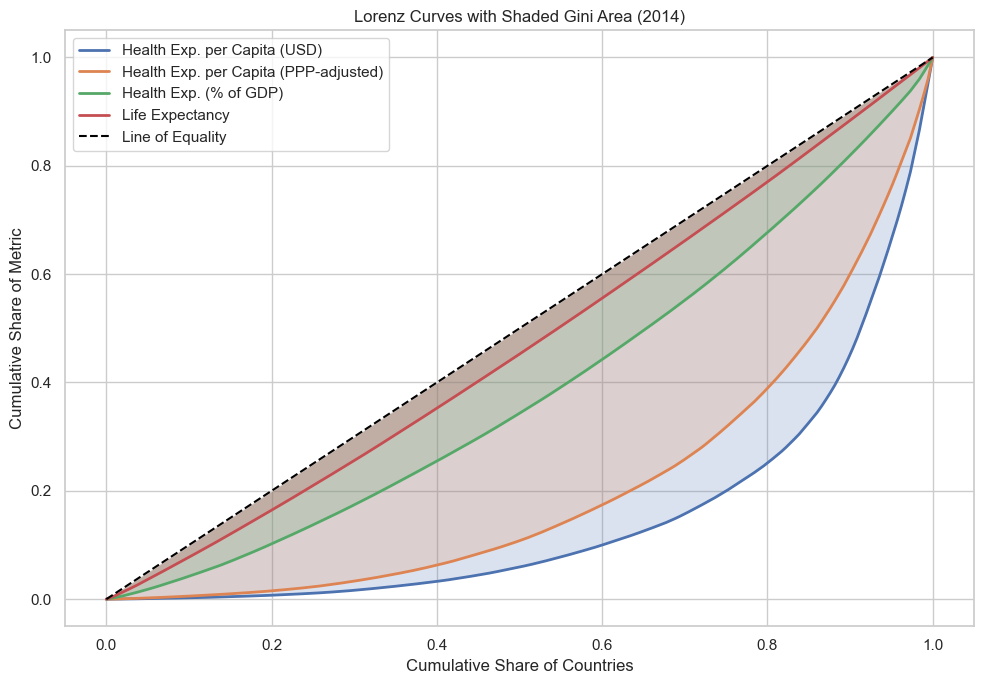

In [19]:
def lorenz_curve(values):
    """Returns cumulative population share and cumulative value share"""
    sorted_vals = np.sort(values)
    cum_vals = np.cumsum(sorted_vals)
    cum_vals = np.insert(cum_vals, 0, 0)  # Start at 0
    cum_vals = cum_vals / cum_vals[-1]   # Normalize to 1
    population = np.linspace(0, 1, len(cum_vals))
    return population, cum_vals

# Filter to 2014
df_2014 = df[df["Year"] == 2014].dropna(subset=[
    "health_exp_per_capita",
    "health_exp_ppp_per_capita",
    "health_exp_percent",
    "Life Expectancy"
])

# Prepare Lorenz curves
metrics = {
    "Health Exp. per Capita (USD)": df_2014["health_exp_per_capita"].values,
    "Health Exp. per Capita (PPP-adjusted)": df_2014["health_exp_ppp_per_capita"].values,
    "Health Exp. (% of GDP)": df_2014["health_exp_percent"].values,
    "Life Expectancy": df_2014["Life Expectancy"].values,
}

# Plot
plt.figure(figsize=(10, 7))

for label, values in metrics.items():
    pop, lorenz = lorenz_curve(values)
    plt.plot(pop, lorenz, label=label, linewidth=2)
    plt.fill_between(pop, pop, lorenz, alpha=0.2)  # Shade Gini area

# Line of equality
plt.plot([0, 1], [0, 1], color="black", linestyle="--", label="Line of Equality")

plt.title("Lorenz Curves with Shaded Gini Area (2014)")
plt.xlabel("Cumulative Share of Countries")
plt.ylabel("Cumulative Share of Metric")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Health Exp. per Capita (USD)

- Most unequal curve — the bottom ~80% of countries account for just a small share of total spending.

- Reflects massive disparities in absolute health investment.

- Matches the Gini ≈ 0.70 we calculated earlier.

### Health Exp. per Capita (PPP-adjusted)

- Slightly fairer, but still very unequal.

- Adjusting for purchasing power improves equity modestly — but structural inequality largely persists.

### Health Exp. (% of GDP)

- Much closer to the equality line, suggesting relative national effort is more evenly distributed.

- Even low-income countries tend to invest a significant share of GDP — but the GDP itself is small.

- Explains why this metric has lower correlation with life expectancy than absolute per-capita measures.

### Life Expectancy

- Nearly hugs the equality line → least inequality.

- Suggests that health outcomes are far more equitable than spending.

- Implies some diminishing returns: countries achieve decent life expectancy without matching spending.

### Overall Insight:

These curves visually affirm the Gini analysis:

- Life expectancy is a relatively fair outcome in global terms.

- Spending (especially unadjusted) is highly unequal, yet doesn’t proportionally translate to improved longevity.

- This contrast invites a deeper look into healthcare efficiency, system design, and non-monetary factors impacting life expectancy (education, governance, nutrition, etc.).

In [28]:
from sklearn.linear_model import LinearRegression

def plot_efficiency_frontier(
    df,
    year,
    spending_type,
    top_n=5
):
    """
    Plots an efficiency frontier for life expectancy vs health spending,
    automatically highlighting top N efficient and inefficient countries.

    Parameters:
        df (pd.DataFrame): Cleaned DataFrame with health & life data.
        year (int): Year to visualize.
        spending_type (str): Column of health spending metric.
        top_n (int): Number of most/least efficient countries to highlight.
    """
    data = df[df["Year"] == year][["Country Name", spending_type, "Life Expectancy"]].dropna()
    data = data[data[spending_type] > 0].copy()
    data["log_spending"] = np.log(data[spending_type])

    # Fit log-linear regression
    model = LinearRegression()
    X = data["log_spending"].values.reshape(-1, 1)
    y = data["Life Expectancy"].values
    model.fit(X, y)
    data["predicted_life"] = model.predict(X)
    data["residual"] = data["Life Expectancy"] - data["predicted_life"]

    most_efficient = data.nlargest(top_n, "residual")
    least_efficient = data.nsmallest(top_n, "residual")

    x_range = np.linspace(data[spending_type].min(), data[spending_type].max(), 200)
    y_curve = model.predict(np.log(x_range).reshape(-1, 1))

    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=data, x=spending_type, y="Life Expectancy", alpha=0.5, color="lightgray", label="Countries")
    plt.plot(x_range, y_curve, color="blue", linestyle="--", label="Efficiency Frontier")

    sns.scatterplot(data=most_efficient, x=spending_type, y="Life Expectancy", color="green", s=90, label="Efficient")
    sns.scatterplot(data=least_efficient, x=spending_type, y="Life Expectancy", color="red", s=90, label="Inefficient")

    for _, row in pd.concat([most_efficient, least_efficient]).iterrows():
        plt.text(row[spending_type], row["Life Expectancy"] + 0.3, row["Country Name"],
                 fontsize=8, ha='center', color="black")

    plt.xscale("log")
    plt.xlabel(f"{spending_type.replace('_', ' ').title()} (Log Scale)")
    plt.ylabel("Life Expectancy")
    plt.title(f"Efficiency Frontier: Life Expectancy vs {spending_type.replace('_', ' ').title()} ({year})")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()


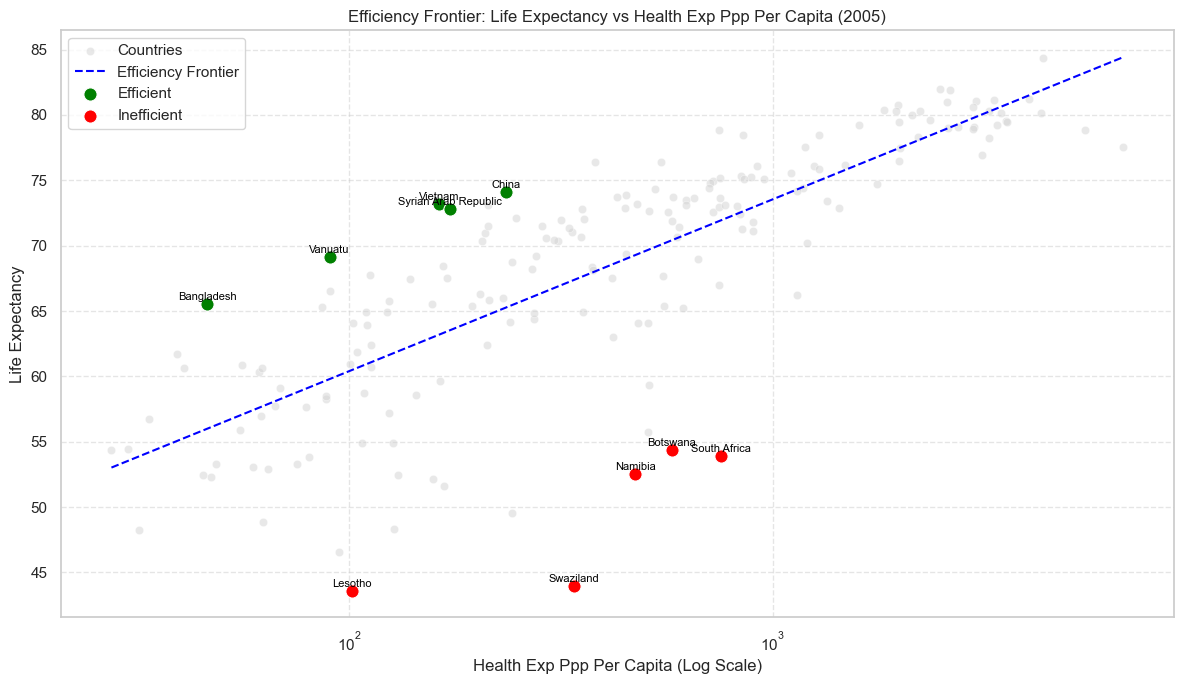

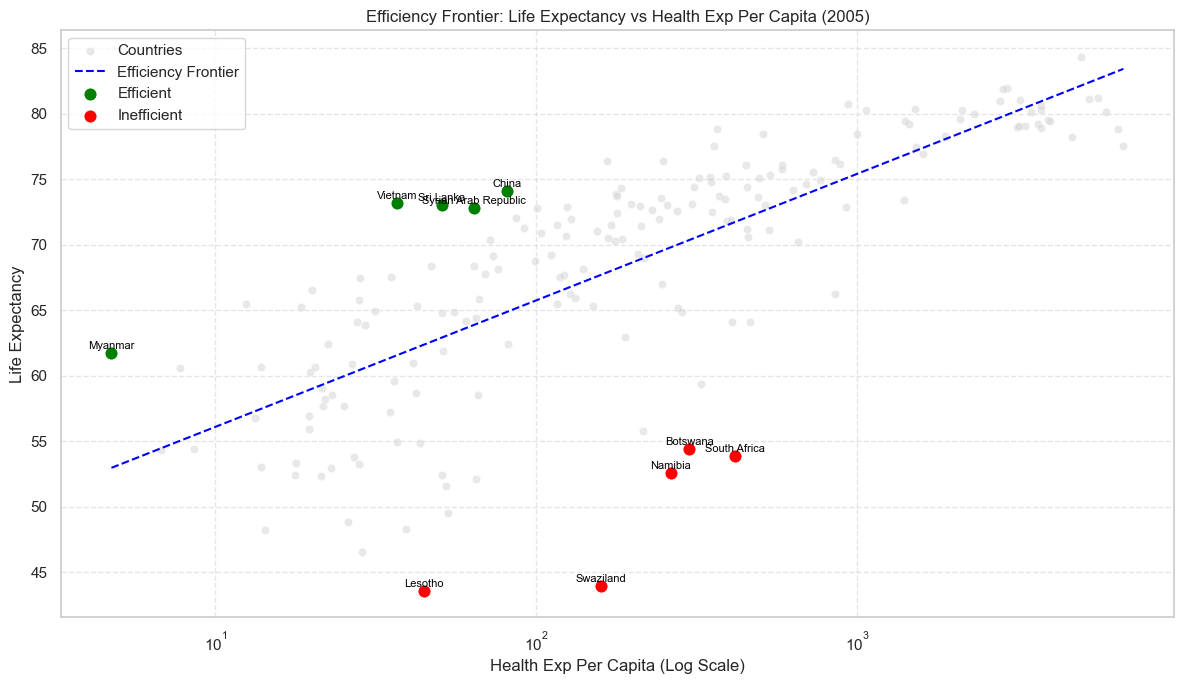

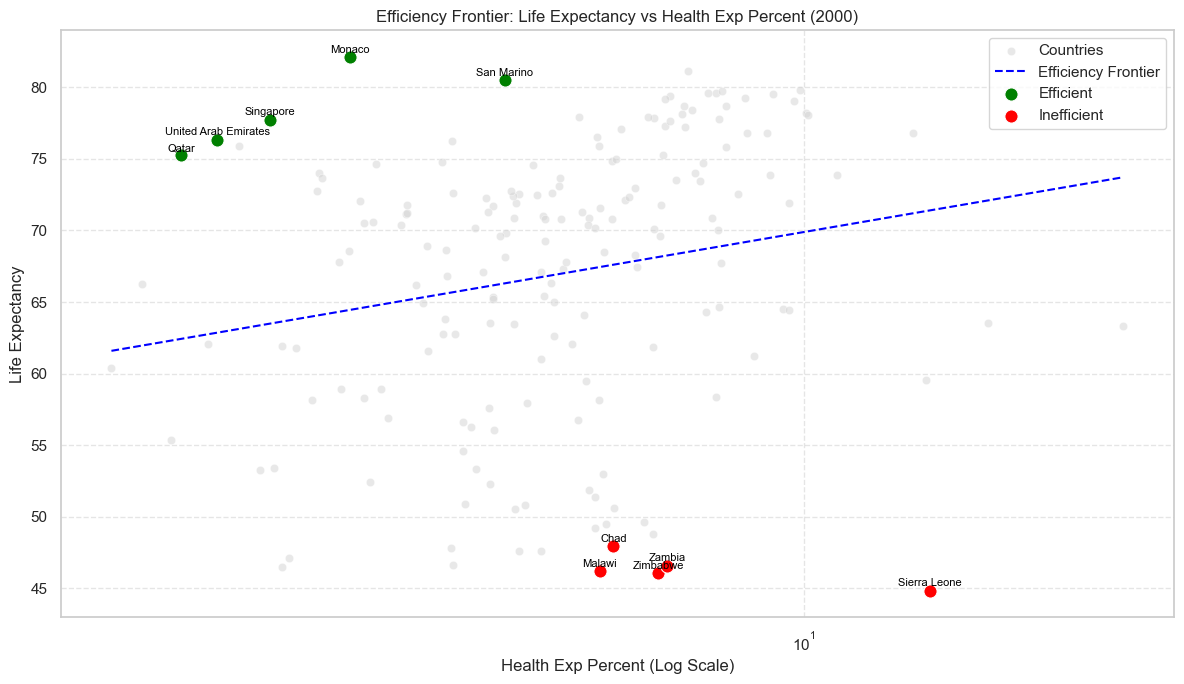

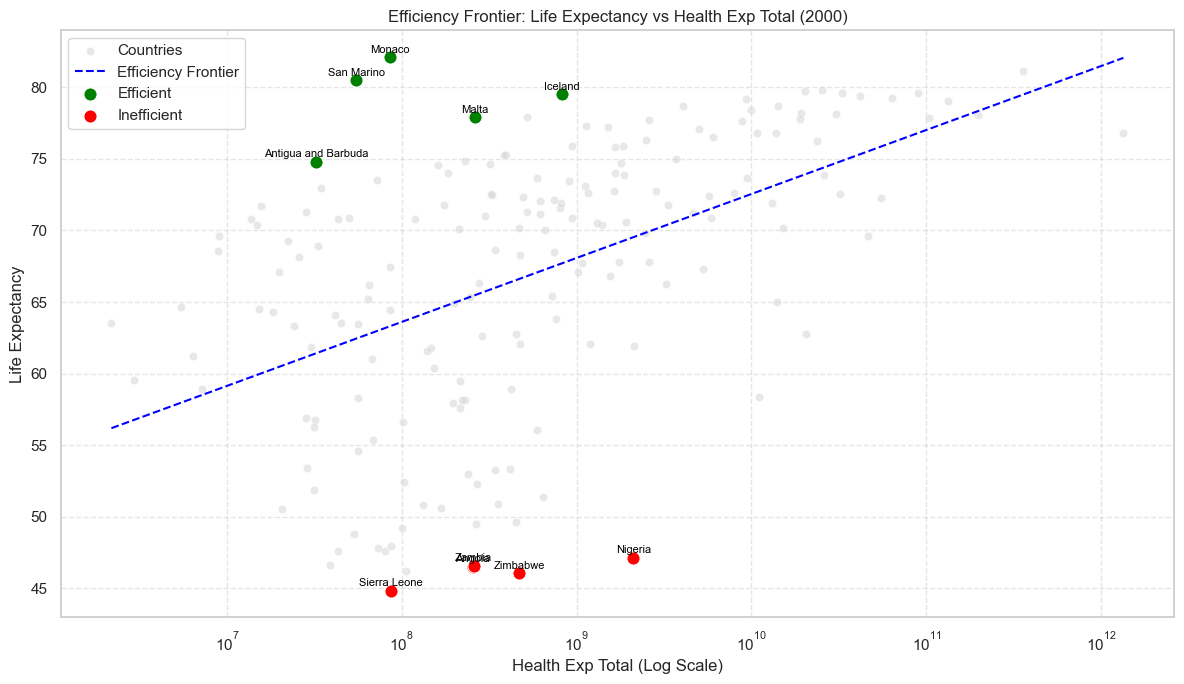

In [33]:
# Load your cleaned CSV
df = pd.read_csv("../data/processed/health_vs_life.csv")

plot_efficiency_frontier(
    df,
    year=2005,
    spending_type="health_exp_ppp_per_capita",
)

plot_efficiency_frontier(
    df,
    year=2005,
    spending_type="health_exp_per_capita",
)

plot_efficiency_frontier(
    df,
    year=2000,
    spending_type="health_exp_percent",
)

plot_efficiency_frontier(
    df,
    year=2000,
    spending_type="health_exp_total",
)



# Year 2000 Efficiency Frontier Analysis

### Most “Efficient” Countries (2000) – High Life Expectancy at Low Spending

- Vietnam (Life Exp ~72.7 years; ~$99 PPP health spend per capita): Vietnam achieved a remarkable life expectancy in 2000 despite very low health spending. This stems from aggressive public health efforts that dramatically reduced infectious diseases and child mortality. By 2000, Vietnam had nearly universal immunization and effective malaria control, which drove under-5 mortality down by ~60–80% since 1990. These preventative measures, alongside rising living standards after the Đổi Mới economic reforms, enabled Vietnam to reach ~73 years life expectancy on minimal spending. The focus on primary care and community health (a legacy of programs like the “barefoot doctors”) meant health outcomes far outpaced what its income level would predict.

- China (Life Exp ~72.3 years; ~$133 PPP per capita): China likewise attained ~72 years life expectancy by 2000 with only modest per-person health spending. Key drivers were broad improvements in basic sanitation, nutrition, and vaccination during prior decades of state-led public health campaigns. Notably, China virtually eliminated diseases like malaria and measles, and under-5 mortality fell ~80% from 1990 to 2015, reflecting gains already largely achieved by 2000. Rapid economic growth in the 1980s–90s improved incomes and living conditions, translating into longer lives even as the health system was still developing. In short, strong preventive health infrastructure and socio-economic progress allowed China to outperform on life expectancy for its level of spending.

- Vanuatu (Life Exp ~68.6 years; ~$73 PPP per capita): The small Pacific nation of Vanuatu managed relatively high longevity in 2000 with extremely low health expenditure. Contributing factors include its community-based lifestyle and external health aid. Public health programs helped achieve significant declines in malaria and tuberculosis prevalence, which improved survival. Immunization coverage was improving as well. With a young, mostly rural population, Vanuatu benefited from traditional diets and lower incidence of the chronic diseases that afflict wealthier nations. These conditions, plus support from international partners in primary care, enabled Vanuatu to reach late-60s life expectancy on a shoestring budget.

- Solomon Islands (Life Exp ~67.1 years; ~$62 PPP per capita): Despite low spending, the Solomon Islands exhibited a life expectancy near 67 in 2000. Like Vanuatu, it saw major gains in controlling communicable diseases. Through the late 1990s and early 2000s, there was a marked decline in malaria and TB in the Solomons, and immunization rates improved. This Pacific archipelago’s rural, subsistence lifestyle and strong community networks likely bolstered health outcomes, even as a civil conflict in 1998–2003 disrupted services. By focusing limited resources on primary care and prevention (often with Australian/New Zealand assistance), the Solomon Islands achieved higher life expectancy than most countries spending similar amounts.

- Myanmar (Life Exp ~60.4 years; ~$20 PPP per capita): Military-ruled Myanmar in 2000 spent nearly the least in the world on health, yet attained a life expectancy of about 60 – higher than many peers. Possible explanations include legacy public health measures and community resilience. Basic vaccination programs (often supported by NGOs and the UN) kept immunization rates fairly high, mitigating child mortality. Myanmar did not face the widescale HIV/AIDS epidemics of Africa, and most of the country was at peace (despite regional conflicts), avoiding the catastrophic mortality seen in war-torn states. Thus, even with only ~$20 (PPP) per capita health spending, some essential health services and improvements in education/sanitation were enough to produce a 60-year life expectancy – an “efficient” outcome given such limited resources.

### Most “Inefficient” Countries (2000) – Low Life Expectancy at High Spending

- Eswatini (Swaziland) (Life Exp ~47.6 years; ~$219 PPP per capita): Swaziland in 2000 had one of the world’s worst HIV/AIDS epidemics, driving a catastrophic drop in life expectancy. HIV prevalence exceeded 25% of adults, and without widespread treatment then, AIDS-related deaths caused life expectancy to plunge from the low 60s to under 50 years. Despite moderate health spending (boosted by donor programs), the sheer impact of AIDS made outcomes “inefficient.” By 2000, Swazi life expectancy was decades lower than expected for its spending – a direct result of HIV wiping out gains. Health resources were overwhelmed, and only in later years would anti-retroviral therapy begin to reverse this trend.

- Zimbabwe (Life Exp ~46.0 years; ~$140 PPP per capita): Once having a decent health system, Zimbabwe by 2000 saw life expectancy free-fall to ~46 years, extraordinarily low given its spending. The late 1990s brought a dual crisis: the HIV/AIDS epidemic (adult prevalence ~25%) and severe economic and governance collapse. As of 2006, Zimbabweans suffered the shortest life expectancy in the world (women 34, men 37), a shocking decline largely rooted in AIDS and the breakdown of healthcare amid political turmoil. In 2000, many clinics lacked medicines, and hyperinflation eroded public health budgets. Thus, even though per-capita health expenditure was relatively high for Africa, funds were squandered by chaos and the unchecked AIDS scourge, yielding very poor longevity – a clear outlier of inefficiency.

- Sierra Leone (Life Exp ~44.8 years; ~$111 PPP per capita): Sierra Leone was just ending a brutal civil war in 2000, and it languished with one of the lowest life expectancies on Earth (in the 30s–40s years range). This West African nation spent a moderate amount on health by regional standards, but years of conflict (1991–2002) had decimated hospitals and driven doctors out. The result was sky-high infant and maternal mortality and rampant disease, dragging life expectancy far below the predicted level. In fact, around that time Sierra Leone ranked last globally in life expectancy (~35–40 years), despite the spending it did make. Ongoing poverty and virtually nonexistent rural healthcare made its health system extremely inefficient at converting expenditures into outcomes.

- Botswana (Life Exp ~52.3 years; ~$381 PPP per capita): Botswana illustrates an upper-middle-income country ravaged by HIV/AIDS. By 2000 its life expectancy had collapsed to ~52 years, even though it spent a very high $380+ PPP per capita on health – far above most African countries. The reason was a massive AIDS burden (adult HIV prevalence ~30% in the late 1990s). In just one decade, Botswana’s life expectancy plunged from ~64 years in 1990 to only ~49 by 2002. This resource-rich nation invested in healthcare (and would soon roll out ARVs widely), but in 2000 those investments had yet to overcome the onslaught of AIDS. The “efficiency” of spending was thus low – a well-funded system still saw life expectancy akin to much poorer countries, underscoring how a singular epidemic can undercut health outcomes.

- Zambia (Life Exp ~46.6 years; ~$119 PPP per capita): Zambia in 2000 also fell severely below the trend line, with life expectancy in the mid-40s despite moderate spending. Like its neighbors, Zambia was hit hard by HIV/AIDS (adult prevalence ~15–20%) throughout the 1990s. The epidemic, combined with persistent poverty and underinvestment in rural health services, meant that by the late 90s Zambian life expectancy had dropped into the 40s (from over 50 years in the 1980s). Health expenditure, bolstered by foreign aid, was not low, but much of it went to coping with the HIV crisis and an overwhelmed health system. High child mortality (due to malaria, malnutrition, etc.) also contributed. In sum, disease burden and weak health infrastructure made Zambia’s 2000 outcome far worse than what its spending level would predict.

# Year 2014 Efficiency Frontier Analysis
### Most “Efficient” Countries (2014) – Strong Outcomes for the Money

- Bangladesh (Life Exp ~70.0 years; ~$88 PPP per capita): Bangladesh is often hailed as a “health paradox” – achieving remarkable health outcomes despite low income and spending. By 2014 Bangladeshis lived ~70 years on average, well above expectation for ~$88 per-capita spending. The country did this through innovative, low-cost public health programs: vast networks of NGO and government community health workers have driven down infant, child, and maternal mortality. For example, mass immunizations, oral rehydration therapy for diarrhea, family planning, and female education initiatives all improved survival. Researchers note Bangladesh “outperformed its Asian neighbors…defying the view that high spending is needed for better health”. In short, an emphasis on primary care and partnerships (public, private, NGO) allowed Bangladesh to convert each health dollar into large gains in life expectancy.

- Eritrea (Life Exp ~65.5 years; ~$51 PPP per capita): Impoverished and isolated, Eritrea nonetheless emerged as an efficiency success by 2014. Life expectancy climbed to mid-60s on only ~$50 per capita spending. Eritrea’s government, often in collaboration with communities, prioritized cost-effective interventions: near-universal childhood vaccination, widespread malaria control, and health education contributed to a rapid fall in child and infant mortality. Indeed, Eritrea was one of the few African countries to achieve the health-related Millennium Development Goals, cutting under-5 mortality by two-thirds and boosting immunization to ~95% by 2015. The country’s approach – tight government coordination, multi-sector community involvement, and innovative use of limited resources – meant that even with very low expenditures, basic health outcomes improved dramatically. This makes Eritrea an outlier that attained high efficiency in health spending.

- Sri Lanka (Life Exp ~75.8 years; ~$369 PPP per capita): Sri Lanka stands out for achieving near OECD-level life expectancy (mid-70s) at a fraction of the cost. In 2014 it spent only around 3.5% of GDP on health (~$369 PPP per person), yet had outcomes on par with much richer nations. The secret is a long-standing pro-poor public health system. Since the 1930s Sri Lanka has provided free universal healthcare with a strong focus on preventive and primary care. This led to excellent maternal and child health indicators and control of infectious diseases – “much better outcomes…than would have been predicted by its income level,” as the World Bank notes. Crucially, Sri Lanka proved that even low levels of health spending can yield outstanding results: its experience shows that large budgets are not always required to achieve low infant mortality and long life. Continued investment in educated health workers, rural clinics, and preventive services paid off in one of the world’s most efficient health systems.

- Solomon Islands (Life Exp ~69.0 years; ~$108 PPP per capita): By 2014, the Solomon Islands had nearly 69 years life expectancy on about $108 PPP per capita – again reflecting success against communicable diseases. In the 2000s, with post-conflict stability and external aid, the Solomons saw a marked decline in malaria and tuberculosis, historically major killers. Immunization coverage improved (though with some volatility due to geographic challenges). With most of its population rural and engaged in subsistence living, the country benefited from healthier diets and active lifestyles limiting chronic disease. Donor-supported programs for malaria bed nets, TB treatment, and primary care outreach in villages helped extend lifespan. Thus, the Solomons converted relatively low spending into a high life expectancy, underscoring the efficiency gains from targeted disease-control programs and community health efforts in the Pacific.

- Albania (Life Exp ~78.0 years; ~$615 PPP per capita): Albania offers an example from Europe of efficient health spending. Despite a per-capita health spend (~$615 PPP) only one-tenth of some Western European countries, Albania in 2014 achieved a life expectancy of about 78 years. This post-communist Balkan nation benefited from historical investments in basic healthcare and education – for instance, widespread vaccination and health clinics were established in the communist era, giving a strong baseline. By the 2010s, Albania’s health profile (especially for maternal/child health) was similar to its higher-income neighbors. Lifestyle and diet may have played a role as well (a Mediterranean diet and tight-knit family support). Moreover, Albania has had no major epidemics and no wars since 1999, so its health gains weren’t derailed. The result is that Albania’s life expectancy surpassed many countries that spend far more, indicating a high-efficiency outcome. Its experience aligns with other middle-income Eastern European states that see rapidly improving longevity even with moderate health budgets.

### Least “Efficient” Countries (2014) – Poor Outcomes Despite High Spending

- Eswatini (Swaziland) (Life Exp ~53.5 years; ~$587 PPP per capita): In 2014 Eswatini was still grappling with the legacy of AIDS. Thanks to international funding, health spending per person was very high for a low-income country – over $580 PPP, much of it devoted to HIV treatment programs. Yet life expectancy was only ~53 years, placing Eswatini far below the trend line. The cause remained its extraordinary HIV prevalence (around 26% of adults). Although by 2014 antiretroviral therapy had become more available (Swaziland achieved >60% ART coverage by then), decades of AIDS devastation meant persistently elevated mortality. In the 2000s, life expectancy had literally been cut in half (to the 30s) before rebounding to the 50s with treatment scale-up. Even so, widespread co-infections like TB and the strain on the health system kept life expectancy low relative to spending. Essentially, no amount of money in the short run could fully offset the impact of HIV/AIDS on Swaziland’s demographics, making it appear very inefficient in 2014.

- Lesotho (Life Exp ~50.8 years; ~$276 PPP per capita): Lesotho, a mountainous kingdom enveloped by South Africa, showed a similar pattern of high disease burden undermining health returns. With about $276 PPP per capita spending, Lesotho’s life expectancy (~51 years) was the second-lowest in the world in the mid-2010s. The driver was, again, HIV/AIDS, which infected ~25% of adults by 2014. Lesotho also suffers from one of the world’s highest TB infection rates (often HIV co-infection) and has difficult geography that hinders healthcare delivery to remote villages. Even though significant donor and government funds went into healthcare (including HIV programs), the country’s human resources for health were limited, and many HIV-positive individuals were not yet reached with therapy by 2014. The result was an extremely high adult mortality rate and life expectancy far below what its spending might predict. In short, Lesotho’s generalized AIDS epidemic and health system challenges meant money was not translating efficiently into years of life.

- Equatorial Guinea (Life Exp ~60.2 years; ~$1,163 PPP per capita): Equatorial Guinea is a notorious example of a “resource-curse” state with poor social outcomes. Flush with oil money, it spent a staggering ~$1.16k (PPP) per person on health in 2014 – on paper one of the highest in Africa – yet life expectancy was only ~60, below the African average. The core issue is governance and inequitable investment. Under a corrupt authoritarian regime, vast oil revenues have been siphoned into elites’ pockets or prestige projects, with very little allocated to basic health services. In 2011, the government spent only $92 million on health (out of billions in oil income), focusing instead on infrastructure contracts that often benefited officials. By 2015, immunization rates for infants were shockingly low – only ~25% coverage for polio/measles, among the worst in the world. Unsurprisingly, life expectancy and child mortality in Equatorial Guinea lag behind even poorer neighbors. The high spending figure likely reflects some specialized or private healthcare that serves the elite (and high costs in the capital), rather than effective public health for the population. Thus, Equatorial Guinea’s vast expenditures have yielded only 60 years life expectancy, due to mismanagement, corruption, and failure to invest in broad-based health systems.

- South Sudan (Life Exp ~45.6 years; ~$73 PPP per capita): The world’s newest country in 2014, South Sudan, had one of the lowest life expectancies (mid-40s) despite moderate health spending for its income. After decades of civil war, South Sudan’s independence in 2011 was followed almost immediately by a new internal conflict (December 2013) – a humanitarian catastrophe that decimated health services. By 2014, South Sudan had catastrophic health indicators: life expectancy in the mid-50s or below, under-5 mortality of 135 per 1,000 live births, and the world’s worst maternal mortality rate. Health expenditure included substantial international aid, but ongoing fighting made it nearly impossible to deliver care outside of UN protected camps. Hospitals and clinics were destroyed or abandoned in large parts of the country. As a result, money could not translate into effective healthcare – South Sudan was essentially off the efficiency curve due to war and state failure. Every health outcome (vaccination, skilled birth attendance, clean water access) was among the world’s worst, so life expectancy remained around only 45–50 years. Until peace and governance improve, high spending will sadly yield little improvement, as seen in 2014.

- Namibia (Life Exp ~59.3 years; ~$869 PPP per capita): Namibia in 2014 spent a hefty ~$869 PPP per person (thanks to diamond mining wealth and considerable health investment), yet life expectancy was about 59 – very low for that spending level. The primary reason was the long-tail impact of HIV/AIDS. In the 1990s, Namibia’s life expectancy fell from ~61 years in 1993 to ~50 years in 2003 as AIDS became the leading cause of death. By 2014, with improved treatment, life expectancy had rebounded close to 60, but it was still nowhere near what an upper-middle-income country might achieve absent AIDS. Namibia’s epidemic, while slowly receding (adult prevalence ~13% in 2014), left a legacy of many middle-aged adults lost to disease, which skews life expectancy downward. Additionally, inequities between the relatively well-off urban population and the poorer, rural communities affected by apartheid-era disparities meant that not all segments benefited equally from health spending. For example, Namibia has world-class private hospitals used by the affluent, but many rural poor still lack access to quality care. These internal disparities and the HIV burden made Namibia’s overall outcomes lag. Consequently, in 2014 it appears “inefficient,” with funding levels similar to some Eastern European countries but life expectancy ~20 years shorter. The country has since improved (life expectancy mid-60s by late 2010s), but in 2014 the resource allocation and epidemic aftermath kept it below the efficiency frontier.

# Cross-Country Patterns and Thematic Analysis

### Health Spending vs. Life Expectancy – Key Patterns (2000 vs 2014): 

Across both 2000 and 2014, a clear theme is that money alone does not guarantee health outcomes – and conversely, astute public health efforts can deliver longevity even on a tight budget. Efficient countries typically tackled major disease burdens through prevention and primary care, whereas inefficient countries were often overwhelmed by epidemics or governance failures. Several broad patterns emerge:

- Impact of Epidemics (HIV/AIDS) and Conflict: The most inefficient outliers in both 2000 and 2014 are heavily concentrated in Sub-Saharan Africa and share one of two scourges: HIV/AIDS or recent conflict (often both). For example, Southern African nations like Eswatini, Lesotho, Botswana, Zambia, Zimbabwe, and Namibia all had HIV prevalence rates above 15–25%, which in the late 1990s–2000s led to unprecedented mortality spikes. These countries were spending significant funds (often with donor help) on health, yet life expectancy in 2000–2014 was 10–20 years lower than expected because AIDS was killing young adults in large numbers. It’s telling that in 2000, four of the five worst outliers were in the AIDS epicenter of Southern Africa. By 2014, with treatment available, some (Botswana, Zambia) had moved closer to the pack, but others like Swaziland and Lesotho still languished. Similarly, countries engulfed in war during these periods – Sierra Leone (1990s), South Sudan (2010s) – saw life expectancy collapse regardless of spending. War destroys health systems and drives hunger and disease, so even moderate expenditures couldn’t prevent extremely low life expectancies in these states. In summary, high disease burdens and conflict can decouple spending from outcomes, leading to very inefficient points on the frontier.

- Governance and Resource Utilization: Another theme is the role of governance quality and how health resources are used. An illuminating comparison is Sri Lanka vs. Equatorial Guinea. In 2014, Sri Lanka spent only about $369 (PPP) per capita yet attained 75.7 years life expectancy, while Equatorial Guinea spent over $1,160 PPP per capita but managed only about 60 years. Sri Lanka’s efficiency stems from decades of wise policy – free primary healthcare, effective preventive programs, and equitable access – meaning each dollar spent actually reaches the population in the form of vaccines, clinics, and medicines. Equatorial Guinea, by contrast, illustrates the worst of misgovernance: enormous oil wealth that could fund health was instead diverted. By 2015, only 1 in 4 children in Equatorial Guinea received basic immunizations, and the country’s life expectancy was below the sub-Saharan African average despite the highest per-capita spending on the continent. This stark divergence highlights that how money is spent is pivotal. Public health experts often cite Sri Lanka as proof that “efficient, pro-poor use of funds can yield excellent outcomes without large budgets”, whereas Equatorial Guinea is a case of a “resource curse” – wealth without health due to corruption.

- Primary Health Care and Education Yield High Efficiency: Many of the top-performing efficient countries (Vietnam, Bangladesh, Eritrea, Sri Lanka, Albania in these lists) invested early and consistently in primary health care, education, and basic social services. These investments translated into lower infant mortality, higher vaccination rates, better nutrition, and control of infectious diseases – all foundational for longer life expectancy. For instance, Bangladesh’s outreach with community health workers led to high coverage of diarrhea treatment, family planning, and TB control, allowing it to “do more with less” health spending. Eritrea’s multi-sector community approach achieved child survival gains even under economic sanctions. Vietnam and China’s massive public health campaigns in the latter 20th century virtually eradicated the biggest killers (like malaria) and raised life expectancy rapidly. In short, countries that prioritized preventive care, rural health access, and education ended up high on the efficiency frontier – they squeezed out extra life-years per dollar by reducing the cheapest, most addressable causes of death (infectious disease, poor maternal/newborn care). This pattern often correlates with political commitment to health: Sri Lanka’s government-led universal care, or Vietnam’s socialist-era health coverage, for example. Even with low GDP, these countries built systems that deliver essential interventions widely, thus outperforming wealthier peers in health outcomes.

- Regional and Income Level Differences: Generally, lower-income countries have more variance in efficiency – some excel (Asia-Pacific examples) while others struggle (many in Africa), reflecting differing capacities to handle communicable diseases and differing governance. By 2014, we also see middle-income countries converging toward high efficiency (e.g. Albania, China, Vietnam all nearing 75+ years life expectancy on moderate spending), whereas a few middle-income states with unique challenges (Namibia with HIV, Russia – not in our list but known for high spending but stagnating life expectancy due to lifestyle) lag behind. High-income countries cluster toward the frontier’s upper-right (high spending, high life expectancy), but even there we could note the USA often sits below the best-fit line (very high spending but life expectancy in the high 70s). However, in a global 2014 context, the U.S. was not among the worst residuals once poorer countries’ issues are considered. The biggest outliers remained those with specific health crises or policy failures rather than just inefficiencies of excess treatment. Notably, sub-Saharan Africa in 2000 averaged 8–10 “lost” life years due to inefficient use of health resources, largely attributable to systemic issues discussed. By 2014, some African countries (e.g. Rwanda or Ethiopia) had improved efficiency via better health programs, while others like Lesotho and Swaziland remained outliers due to sustained HIV impacts.

- Paired Country Contrasts: Examining countries with similar spending but divergent outcomes crystallizes these themes. For example, Albania vs. Namibia (2014) had comparable health expenditures ( ~$600–$870 PPP per capita) but life expectancies of 78 vs 59 years respectively. Albania, with its stable public health system and improving economy, had by 2014 almost universal vaccination and relatively low prevalence of HIV/non-communicable disease, so people lived into old age. Namibia, despite higher spending, was dragged down by its HIV/AIDS prevalence (≈13% in 2014) and a rural-urban healthcare gap – factors money alone struggled to fix. Similarly, Sri Lanka vs. Equatorial Guinea (as detailed) embody how governance and health system orientation matter more than raw spending. Sri Lanka’s low-cost preventive model produced developed-country lifespans (mid-70s) on a low budget, whereas Equatorial Guinea’s misallocated lavish spending left it with developing-country lifespans (~60). These comparisons underline that health expenditure is most effective when funneled into broad, cost-effective interventions and when a country tackles its particular health challenges head-on. Where funds are lost to corruption or focused only on expensive tertiary care for the few, efficiency plummets – people do not live much longer despite high spend.

# Conclusion – Efficiency Frontier Insights: 

Between 2000 and 2014 the global health efficiency frontier shifted upward (as many countries increased spending and achieved higher life expectancy), but the relative positions of countries were largely explained by the above factors. Nations that controlled communicable diseases, maintained peace/stability, and built inclusive primary health systems consistently punched above their weight in life expectancy. In contrast, those beset by pandemics (HIV), poor governance, or conflict showed the biggest shortfalls, often “missing” 10–20 years of life expectancy relative to their spending. Importantly, prioritizing PPP-adjusted per capita spending helps account for cost-of-living differences – many of the efficient countries benefited from lower costs (e.g. hiring community nurses cheaply), further stretching each PPP-adjusted dollar. But as seen, it’s not just the amount of money (PPP or otherwise) – it’s how it’s utilized. The efficiency frontier analysis thus highlights both success stories (e.g. Sri Lanka, Bangladesh, Vietnam) and cautionary tales (e.g. Equatorial Guinea, conflict-torn states) to inform health policy. Investing in primary health care, addressing key diseases, and ensuring good governance emerge as decisive factors for converting health expenditure into the ultimate outcome: a longer, healthier life for the population.



In [39]:
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

def plot_efficiency_frontier_animated(df, spending_type, top_n=10):
    """
    Plots an animated efficiency frontier for life expectancy vs health spending.
    Only labels the top N efficient and inefficient countries per year.

    Parameters:
        df (pd.DataFrame): Cleaned DataFrame with health & life data.
        spending_type (str): Column of health spending metric.
        top_n (int): Number of most/least efficient countries to label.
    """
    frames = []
    years = sorted(df["Year"].dropna().unique())

    for year in years:
        data = df[df["Year"] == year][["Country Name", spending_type, "Life Expectancy"]].dropna()
        data = data[data[spending_type] > 0].copy()
        data["log_spending"] = np.log(data[spending_type])

        # Fit regression
        model = LinearRegression()
        X = data["log_spending"].values.reshape(-1, 1)
        y = data["Life Expectancy"].values
        model.fit(X, y)
        data["predicted_life"] = model.predict(X)
        data["residual"] = data["Life Expectancy"] - data["predicted_life"]

        most_efficient = data.nlargest(top_n, "residual")
        least_efficient = data.nsmallest(top_n, "residual")

        # Add label column
        data["Label"] = ""
        data.loc[most_efficient.index, "Label"] = data.loc[most_efficient.index, "Country Name"]
        data.loc[least_efficient.index, "Label"] = data.loc[least_efficient.index, "Country Name"]

        # Color categories
        data["Efficiency"] = "Neutral"
        data.loc[most_efficient.index, "Efficiency"] = "Efficient"
        data.loc[least_efficient.index, "Efficiency"] = "Inefficient"

        # Main scatter
        scatter = go.Scatter(
            x=data[spending_type],
            y=data["Life Expectancy"],
            mode='markers+text',
            marker=dict(
                color=data["Efficiency"].map({
                    "Efficient": "green",
                    "Inefficient": "red",
                    "Neutral": "lightgray"
                }),
                size=8,
                opacity=0.7
            ),
            text=data["Label"],
            textposition="top center",
            hovertext=data["Country Name"],
            hoverinfo="text+x+y",
            showlegend=False
        )

        # Efficiency frontier line
        x_range = np.linspace(data[spending_type].min(), data[spending_type].max(), 200)
        y_curve = model.predict(np.log(x_range).reshape(-1, 1))
        line = go.Scatter(
            x=x_range,
            y=y_curve,
            mode='lines',
            line=dict(color="blue", dash="dash"),
            name="Efficiency Frontier",
            showlegend=False
        )

        frames.append(go.Frame(data=[scatter, line], name=str(year)))

    # Figure layout and slider
    fig = go.Figure(
        data=frames[0].data,
        frames=frames,
        layout=go.Layout(
            title=f"Efficiency Frontier Over Time: Life Expectancy vs {spending_type.replace('_', ' ').title()}",
            xaxis=dict(
                title=f"{spending_type.replace('_', ' ').title()} (Log Scale)",
                type="log"
            ),
            yaxis=dict(title="Life Expectancy"),
            updatemenus=[dict(
                type="buttons",
                showactive=False,
                buttons=[dict(label="Play", method="animate", args=[None])]
            )],
            sliders=[dict(
                steps=[dict(method="animate", args=[[str(yr)], {"mode": "immediate"}], label=str(yr)) for yr in years],
                currentvalue={"prefix": "Year: "}
            )]
        )
    )

    return fig


In [40]:
fig = plot_efficiency_frontier_animated(df, "health_exp_ppp_per_capita")
fig.show()
